In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.gridspec as gridspec
from scipy.stats import mode

from read_positions import *



In [161]:
sns.set_style("darkgrid")

palette = sns.color_palette("hls", 5)
sns.set_palette(palette)

In [162]:
df = read_positions(label_dir='../data_all/labels', output_csv='positions.csv')
dates_to_exclude = [pd.to_datetime('2024-01-21').date(), pd.to_datetime('2024-01-22').date(), pd.to_datetime('2024-01-23').date()]
# dates_to_exclude = [pd.to_datetime('2024-01-21')]

df = df[~df['Date'].dt.date.isin(dates_to_exclude)]
df.head(11)
df.info()
sorted(df['Date'].dt.date.unique())

<class 'pandas.core.frame.DataFrame'>
Index: 7720 entries, 0 to 8087
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Camera    7720 non-null   int64         
 1   Date      7720 non-null   datetime64[ns]
 2   X_center  7720 non-null   float64       
 3   Y_center  7720 non-null   float64       
 4   Width     7720 non-null   float64       
 5   Height    7720 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 422.2 KB


[datetime.date(2024, 1, 24),
 datetime.date(2024, 1, 25),
 datetime.date(2024, 1, 26),
 datetime.date(2024, 1, 27),
 datetime.date(2024, 1, 28),
 datetime.date(2024, 1, 29),
 datetime.date(2024, 1, 30),
 datetime.date(2024, 1, 31),
 datetime.date(2024, 2, 1),
 datetime.date(2024, 2, 2),
 datetime.date(2024, 2, 3),
 datetime.date(2024, 2, 4),
 datetime.date(2024, 2, 5),
 datetime.date(2024, 2, 6),
 datetime.date(2024, 2, 7),
 datetime.date(2024, 2, 8),
 datetime.date(2024, 2, 9),
 datetime.date(2024, 2, 10),
 datetime.date(2024, 2, 11),
 datetime.date(2024, 2, 12),
 datetime.date(2024, 2, 13),
 datetime.date(2024, 2, 14),
 datetime.date(2024, 2, 15),
 datetime.date(2024, 2, 16),
 datetime.date(2024, 2, 17),
 datetime.date(2024, 2, 18),
 datetime.date(2024, 2, 19),
 datetime.date(2024, 2, 20),
 datetime.date(2024, 2, 21),
 datetime.date(2024, 2, 22),
 datetime.date(2024, 2, 23),
 datetime.date(2024, 2, 24),
 datetime.date(2024, 2, 25),
 datetime.date(2024, 2, 26),
 datetime.date(2024, 2,

In [163]:
df.drop(columns=['X_center', 'Y_center', 'Width' , 'Height'], inplace=True)

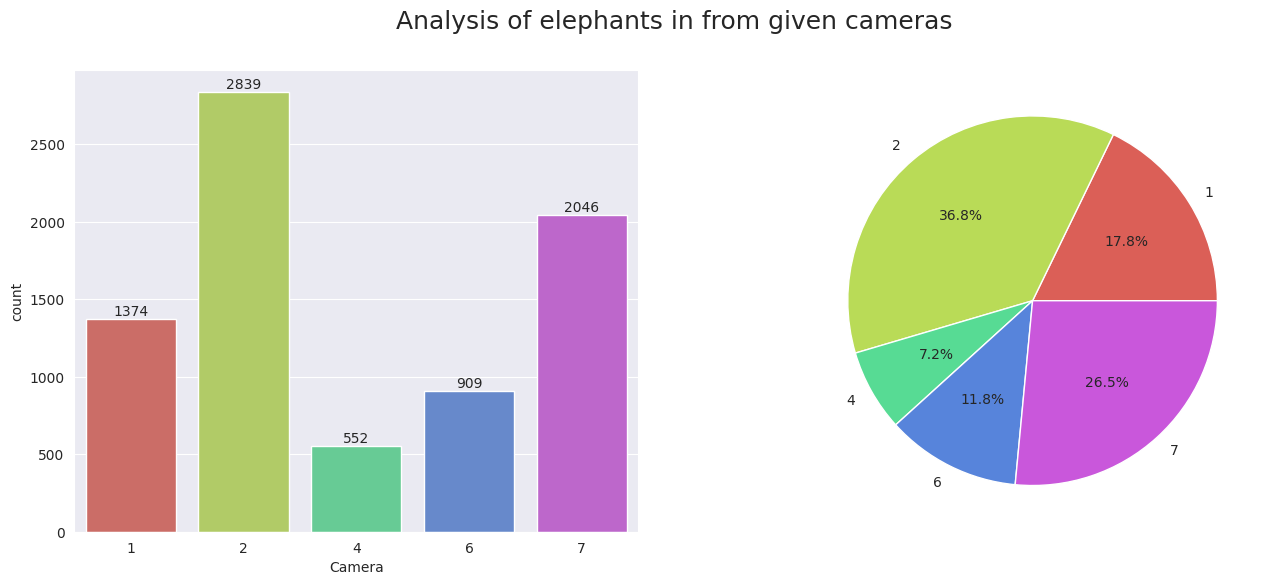

In [164]:
# Inspired from 4th notebook of BI-VIZ course
def univariate_cat_dt(df, column, title):
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True) 
    })
    stats_df.sort_index(inplace=True)
    mode = pd.DataFrame(np.array([
        ["Mode", df[column].mode()[0]], 
    ]), columns=['Name', 'Value'])    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    fig.suptitle(title, fontsize = 18)
    sns.countplot(data=df, x=column, ax=ax1, palette=palette, hue=column)
    
    # Adjusted part: Iterate over all containers
    for container in ax1.containers:
        ax1.bar_label(container)
    ax1.legend().set_visible(False)

    
    ax2.pie(stats_df['Frequency'], labels=stats_df.index, autopct='%1.1f%%')
    plt.show()
    

univariate_cat_dt(df, 'Camera', 'Analysis of elephants in from given cameras')

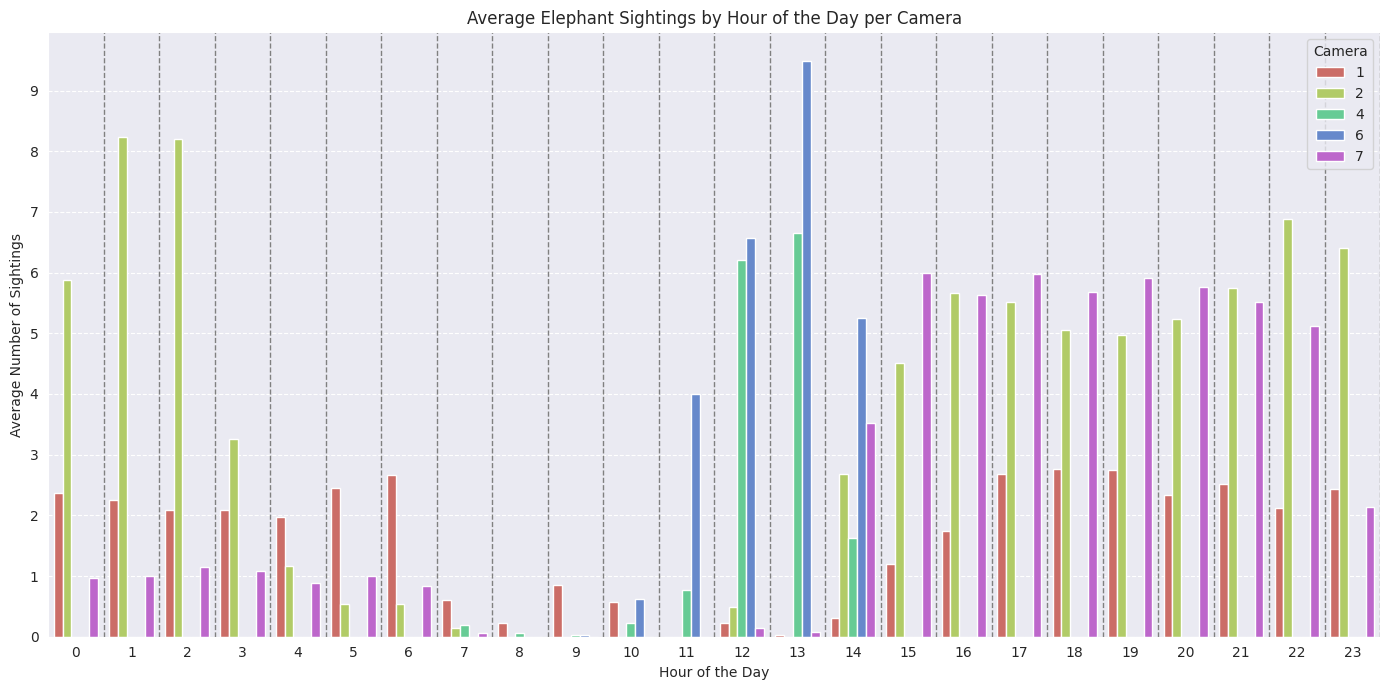

In [165]:
# Calculate the number of unique days to find the divisor for averaging
df['Hour'] = df['Date'].dt.hour
num_days = df['Date'].dt.date.nunique()
hourly_sightings = df.groupby(['Hour', 'Camera']).size().unstack(fill_value=0) / num_days

hourly_sightings_melted = hourly_sightings.reset_index().melt(id_vars='Hour', var_name='Camera', value_name='Average Sightings')

# Adjusting the graph with wider separators
plt.figure(figsize=(14, 7))
sns.barplot(x='Hour', y='Average Sightings', hue='Camera', data=hourly_sightings_melted, dodge=True, palette=sns.color_palette("hls", len(hourly_sightings.columns)))
for hour in range(0, 24):
    plt.axvline(x=hour + 0.5, color='grey', linestyle='--', linewidth=1)

plt.title('Average Elephant Sightings by Hour of the Day per Camera')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Sightings')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.legend(title='Camera', loc='upper right')
plt.yticks(range(0, 10))

plt.tight_layout()
plt.show()


/tmp/ipykernel_3231308/2780855444.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_camera = df.groupby(['Hour', 'Weekday', 'Camera']).size().reset_index(name='Sightings')
/tmp/ipykernel_3231308/2780855444.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_avg_sightings = grouped_by_camera.loc[grouped_by_camera.groupby(['Hour', 'Weekday'])['Average Sightings Per Day'].idxmax()]


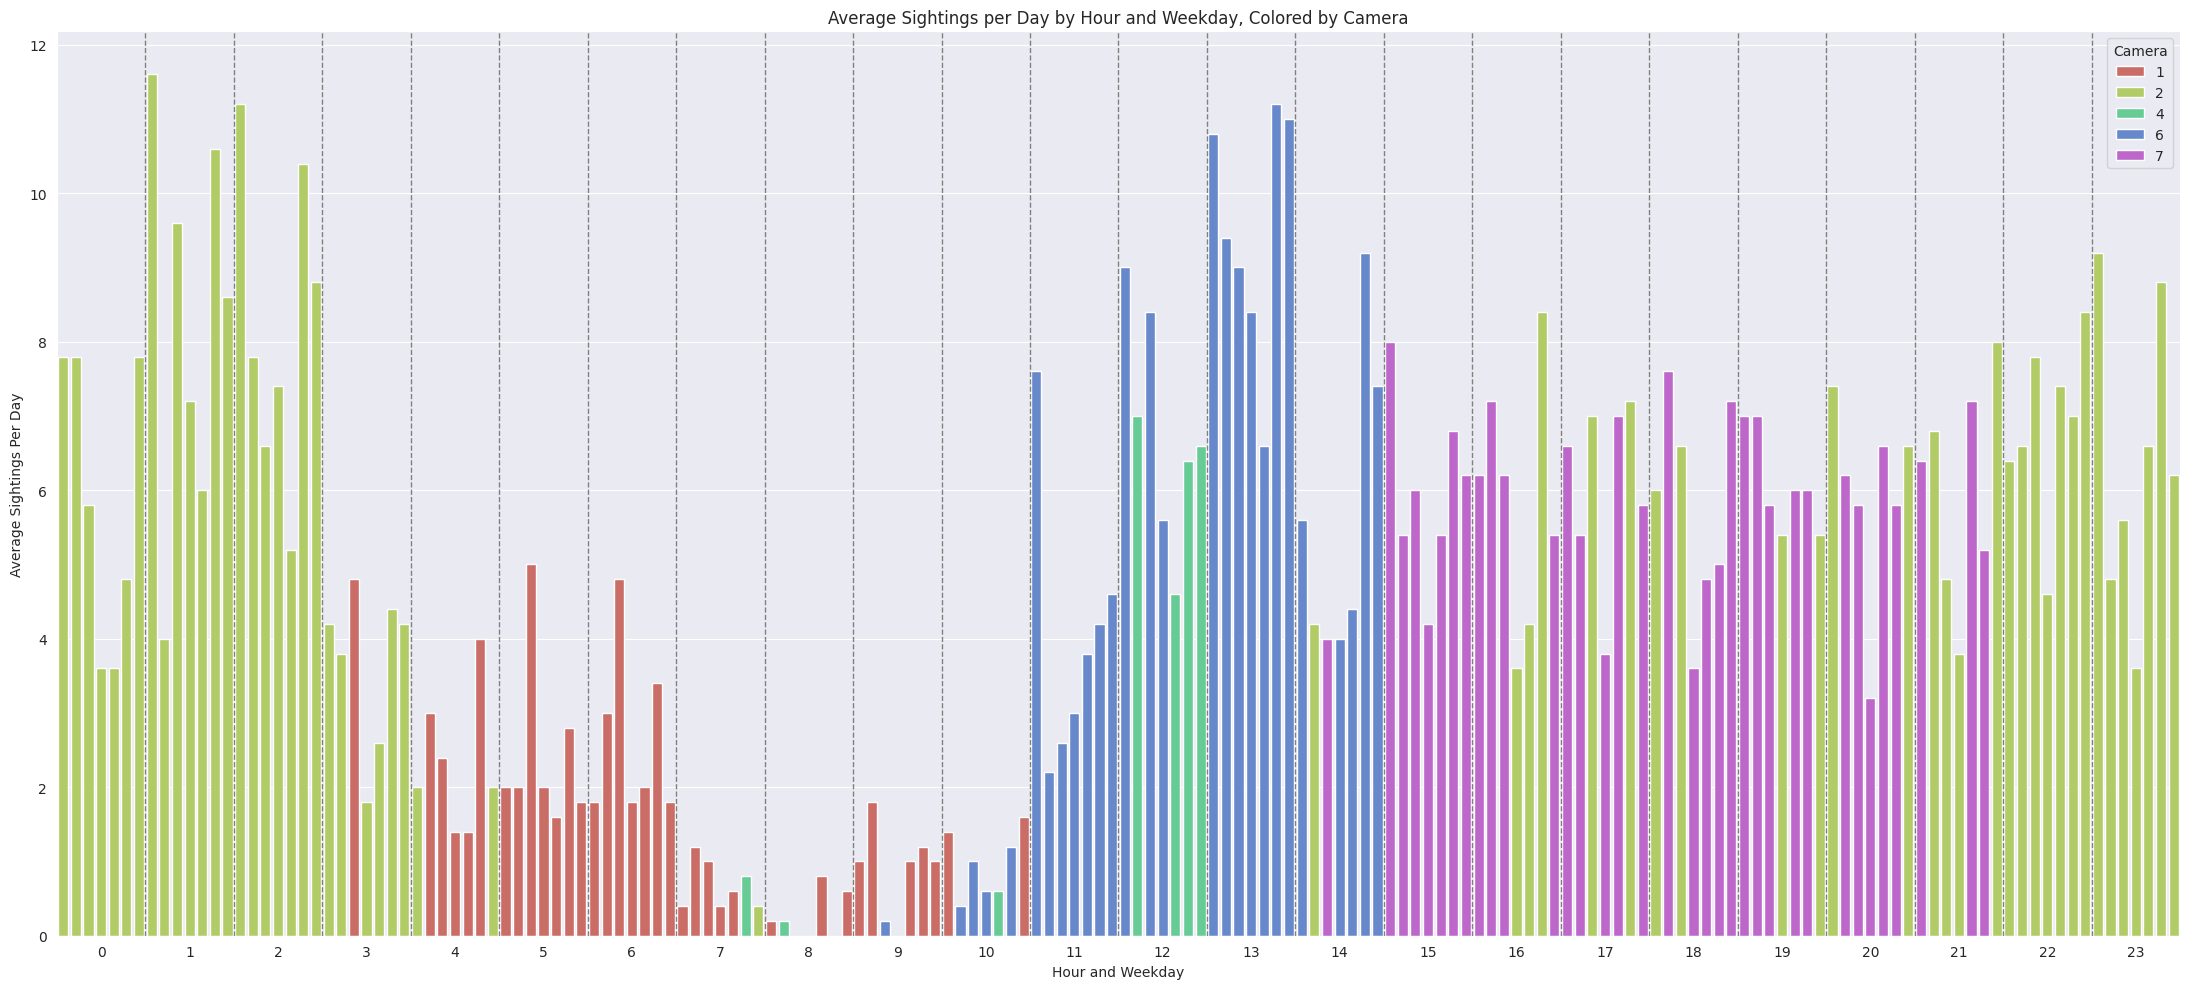

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preparation steps
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)



# Group the data by 'Hour', 'Weekday', and 'Camera', counting sightings
grouped_by_camera = df.groupby(['Hour', 'Weekday', 'Camera']).size().reset_index(name='Sightings')

# Calculate average sightings per day by dividing the total sightings by the number of days in the dataset
# Since the dataset spans 5 weeks, and each week has 7 days, we use this to calculate the total number of days for each weekday
weeks = 5
grouped_by_camera['Average Sightings Per Day'] = grouped_by_camera['Sightings'] / weeks

# Find the maximum average sighting for each "Hour-Weekday" combination
max_avg_sightings = grouped_by_camera.loc[grouped_by_camera.groupby(['Hour', 'Weekday'])['Average Sightings Per Day'].idxmax()]

# Create a 'Hour-Weekday' identifier for plotting
max_avg_sightings['Hour-Weekday'] = max_avg_sightings['Hour'].astype(str) + '-' + max_avg_sightings['Weekday'].astype(str)

# Plotting
plt.figure(figsize=(22, 10))
sns.barplot(x='Hour-Weekday', y='Average Sightings Per Day', hue='Camera', data=max_avg_sightings, dodge=False, palette=sns.color_palette("hls", df['Camera'].nunique()))

unique_hours = sorted(max_avg_sightings['Hour'].unique())
# Determine positions for the unique hour labels, aiming to place them centrally for each group of weekdays
label_positions = [(unique_hours.index(hour) * 7 + 3) for hour in unique_hours]  # Assuming 7 weekdays per hour group, +3 centers the label

plt.xticks(ticks=label_positions, labels=unique_hours, rotation=90)

for pos in label_positions[:-1]:  # Skip the last position to avoid drawing a line at the edge
    plt.axvline(x=pos + 3.5, color='grey', linestyle='--', linewidth=1)  # +3.5 to reach halfway between groups

plt.title('Average Sightings per Day by Hour and Weekday, Colored by Camera')
plt.xlabel('Hour and Weekday')
plt.ylabel('Average Sightings Per Day')
plt.xticks(rotation=0)

plt.legend(title='Camera', loc='upper right')
plt.tight_layout()
plt.show()


/tmp/ipykernel_3231308/3389176086.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_camera_day_type = df.groupby(['Hour', 'Day Type', 'Camera']).size().reset_index(name='Sightings')
/tmp/ipykernel_3231308/3389176086.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_avg_sightings_day_type = grouped_by_camera_day_type.loc[grouped_by_camera_day_type.groupby(['Hour', 'Day Type'])['Average Sightings Per Day'].idxmax()]


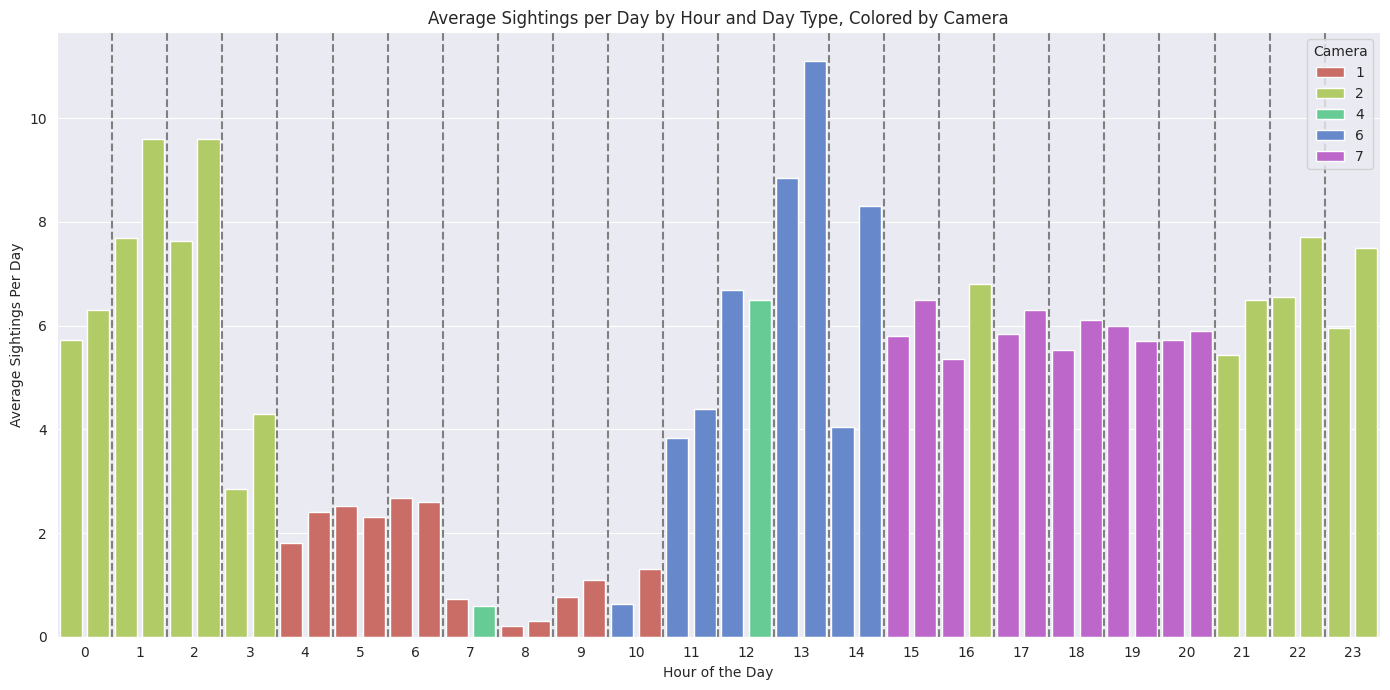

In [167]:
import pandas as pd
import numpy as np
import seaborn as snsa
import matplotlib.pyplot as plt

# Assuming df is already loaded and prepared with 'Hour' and 'Weekday'
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.dayofweek
df['Day Type'] = df['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Workday')

# Convert 'Day Type' into a categorical type with a defined order
df['Day Type'] = pd.Categorical(df['Day Type'], categories=['Workday', 'Weekend'], ordered=True)

# Group the data by 'Hour', 'Day Type', and 'Camera', counting sightings
grouped_by_camera_day_type = df.groupby(['Hour', 'Day Type', 'Camera']).size().reset_index(name='Sightings')

# Fix: Ensure 'Days' column calculation does not involve any categorical type inadvertently
# Calculate days based on 'Day Type' string value rather than the categorical type to avoid the division error
grouped_by_camera_day_type['Days'] = grouped_by_camera_day_type['Day Type'].map({'Workday': 25, 'Weekend': 10}).astype(float)
grouped_by_camera_day_type['Average Sightings Per Day'] = grouped_by_camera_day_type['Sightings'] / grouped_by_camera_day_type['Days']

# Finding the maximum average sighting for each "Hour-Day Type" combination
max_avg_sightings_day_type = grouped_by_camera_day_type.loc[grouped_by_camera_day_type.groupby(['Hour', 'Day Type'])['Average Sightings Per Day'].idxmax()]

# Create a 'Hour-Day Type' identifier for plotting, directly using 'Day Type' string values
max_avg_sightings_day_type['Hour-Day Type'] = max_avg_sightings_day_type['Hour'].astype(str) + '-' + max_avg_sightings_day_type['Day Type'].astype(str)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='Hour-Day Type', y='Average Sightings Per Day', hue='Camera', data=max_avg_sightings_day_type, dodge=False, palette=sns.color_palette("hls", df['Camera'].nunique()))


unique_hours = sorted(max_avg_sightings_day_type['Hour'].unique())
label_positions = [(unique_hours.index(hour) * 2 + 0.5) for hour in unique_hours]  # Assuming 7 weekdays per hour group, +3 centers the label
plt.xticks(ticks=label_positions, labels=unique_hours, rotation=0)
for pos in label_positions[:-1]:  
    plt.axvline(x=pos + 1, color='grey', linestyle='--', linewidth=1.5) 
plt.xticks(rotation=0)

plt.title('Average Sightings per Day by Hour and Day Type, Colored by Camera')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Sightings Per Day')

plt.legend(title='Camera', loc='upper right')
plt.tight_layout()
plt.show()


### Testové statistiky

In [168]:
import scipy.stats as stats
data = df.copy()

In [169]:
grouped_data.describe()

Location,Inside,Outside
count,222.000000,222.000000
mean,0.153153,4.558559
std,0.640958,1.632169
min,0.000000,0.000000
25%,0.000000,3.000000
50%,0.000000,5.000000
75%,0.000000,6.000000
max,5.000000,8.000000


#### **Testování nezávisloti výskytu slonů na kamerách v závislosti na čase**

In [170]:

data['Hour'] = data['Date'].dt.hour

hour_camera_contingency = pd.crosstab(data['Hour'], data['Camera'])
hour_camera_contingency = hour_camera_contingency/num_days
hour_camera_contingency

Camera,1,2,4,6,7
Hour,,,,,
0,2.371429,5.885714,0.000000,0.000000,0.971429
1,2.257143,8.228571,0.000000,0.000000,1.000000
2,2.085714,8.200000,0.000000,0.000000,1.142857
3,2.085714,3.257143,0.000000,0.000000,1.085714
4,1.971429,1.171429,0.000000,0.000000,0.885714
5,2.457143,0.542857,0.000000,0.000000,1.000000
6,2.657143,0.542857,0.000000,0.000000,0.828571
7,0.600000,0.142857,0.200000,0.000000,0.057143
8,0.228571,0.000000,0.057143,0.000000,0.000000


Provedeme Pearsonův $\chi^2$ test nezávislosti s hladinou významnosti 5 %.

- $H_0$:  $p_{ij} = p_{i\cdot} p_{\cdot j}, \qquad i=1,\ldots,r; j=1,\ldots, c$
- $H_A$:  neplatí $H_0$


In [171]:
res = stats.chi2_contingency(hour_camera_contingency)
print(f'Chi2ContingencyResult(statistic={res.statistic}, pvalue={res.pvalue}, dof={res.dof}')

Chi2ContingencyResult(statistic=241.64942570556252, pvalue=2.2119870297040636e-15, dof=92


Na standardní hladině zamítáme ve prospěch alternativy, tedy výskyt slonů je významně ovlivněný časovou dobu.

#### **Testování nezávisloti výskytu slonů venku a vevnitř v závislosti na čase**
Opět využití Pearsovnova $\chi^2$ testu.

- $H_0$:  $p_{ij} = p_{i\cdot} p_{\cdot j}, \qquad i=1,\ldots,r; j=1,\ldots, c$
- $H_A$:  neplatí $H_0$

In [172]:
data['Location'] = data['Camera'].apply(lambda x: 'Outside' if x in [4, 6] else 'Inside')

hour_camera_contingency = pd.crosstab(data['Hour'], data['Location'])
hour_camera_contingency = hour_camera_contingency/num_days

res = stats.chi2_contingency(hour_camera_contingency)
print(f'Chi2ContingencyResult(statistic={res.statistic}, pvalue={res.pvalue}, dof={res.dof}')

Chi2ContingencyResult(statistic=188.85552824824424, pvalue=5.059736379377774e-28, dof=23


Na standardní hladině zamítáme ve prospěch alternativy, tedy venku či vevnitř je významně ovlivněný časovou dobu.

#### **Testování hypotézy, zda jich je slonů mezi $12-14$ významně více venku**

Agregujeme si do tabulky dvě veličiny počtu slonů viděných na vnitřních kamerách oproti počtu ve venkovních.

Použití párového t-testu vyžaduje normalitu rozdílů sledovaných veličin.

Použijeme Shapiro-Wilkův test pro ověření hypotézy o normalitě.

- $H_0$: Rozdíl veličin pochází z náhodného rozdělení
- $H_A$: neplatí $H_0$

In [184]:
filtered_data = data[(data['Hour'] >= 12) & (data['Hour'] < 14)]
grouped_data = data.groupby([filtered_data['Date'], 'Location']).size().unstack(fill_value=0)
stats.shapiro(grouped_data['Inside'] - grouped_data['Outside'])

ShapiroResult(statistic=0.8964443398766632, pvalue=3.0252688940034446e-11)

Na standardní hladině zamítáme normalitu rozdílu daných veličin.
Místo párového t-testu využijeme jeho neparametrickou verzi tedy párový Wilcoxonův test.

- $H_0$: $EZ = 0$
- $H_A$: $EZ < 0$

In [187]:
# Perform a paired t-test on these adjusted sets of observations
adjusted_t_stat, adjusted_p_val = stats.wilcoxon(grouped_data['Inside'], grouped_data['Outside'], alternative='less')  # Added nan_policy='omit' to handle any NaNs

# Print the results of the adjusted paired t-test
print("Adjusted T-Statistic:", adjusted_t_stat)
print("Adjusted P-Value:", adjusted_p_val)

Adjusted T-Statistic: 214.0
Adjusted P-Value: 3.3131167887357384e-37


Na standardní hladině zamitáme ve prospěch alt., tedy slonů je venku mezi 12-14 významně více.